##### $\hspace{15pt}$ **Filename: heartDiseasePrediction_v1.ipynb**
##### $\hspace{1.5pt}$ **Date Created: October 17, 2023**
##### **Date Modified: October 30, 2023**
##### $\rule{10.5in}{1pt}$
##### **Using [PyCaret](https://pycaret.org/), train and test predictive models on the [heart disease prediction dataset](https://www.kaggle.com/datasets/moazeldsokyx/heart-disease) from Kaggle.**
##### $\rule{10.5in}{1pt}$

##### Install pycaret.

In [1]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 8.1 MB/s

##### Load modules and packages.

In [2]:
from google.colab import drive
from pycaret.classification import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### Mount Google Drive to Colab.

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##### Load the train and test sets from Google Drive.

In [4]:
trainSet = pd.read_csv("gdrive/MyDrive/Colab Notebooks/4_heartDiseasePrediction/train.csv")
trainSet.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
testSet = pd.read_csv("gdrive/MyDrive/Colab Notebooks/4_heartDiseasePrediction/test.csv")
testSet.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### Visualize the continuous features in the train and test sets.

In [6]:
trainSet.insert(0, 'dataset', 'train')
testSet.insert(0, 'dataset', 'test')
fullDataset = pd.concat([trainSet, testSet], ignore_index = True)

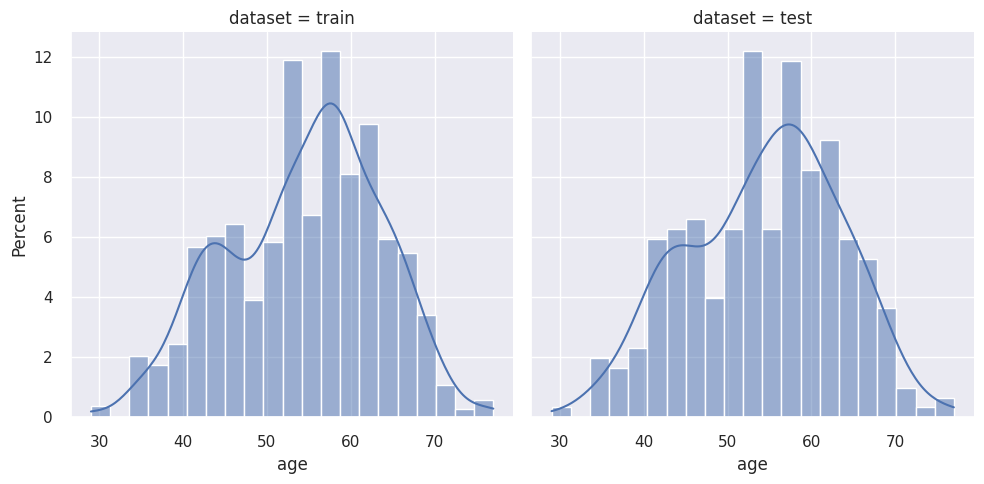

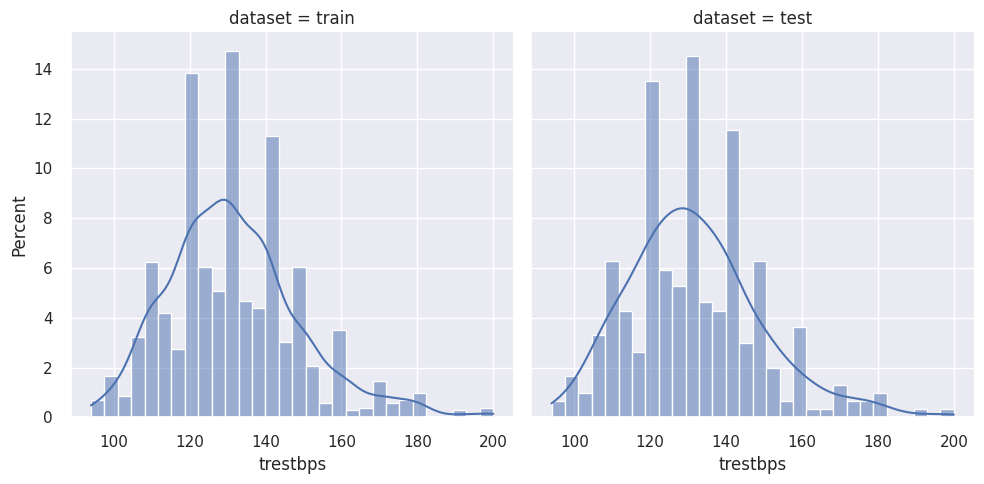

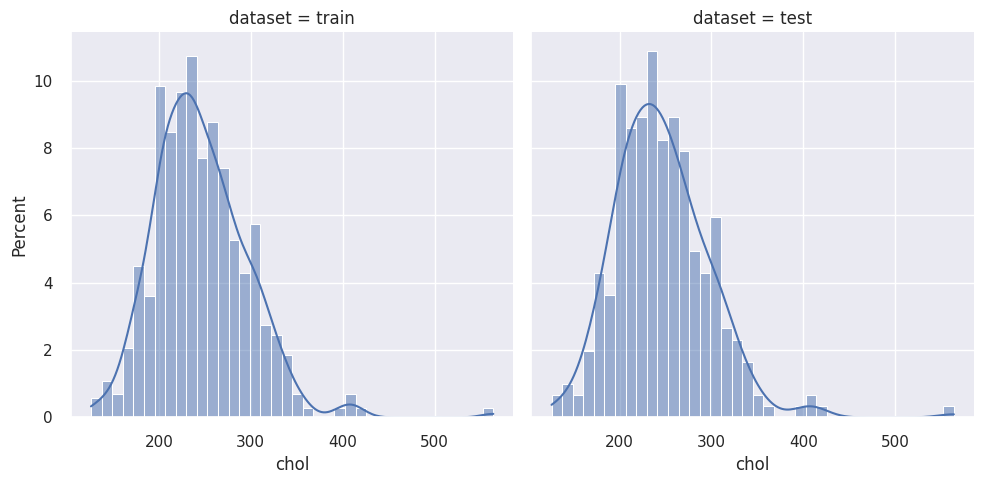

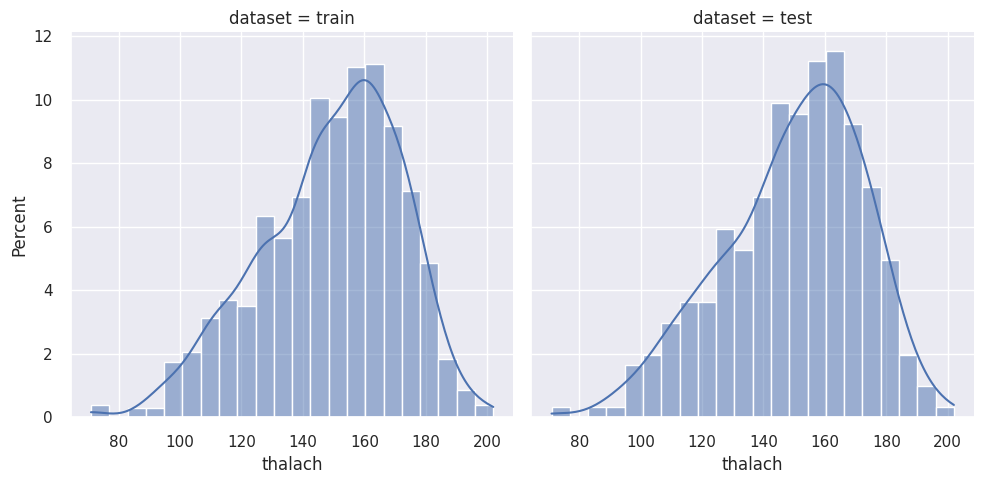

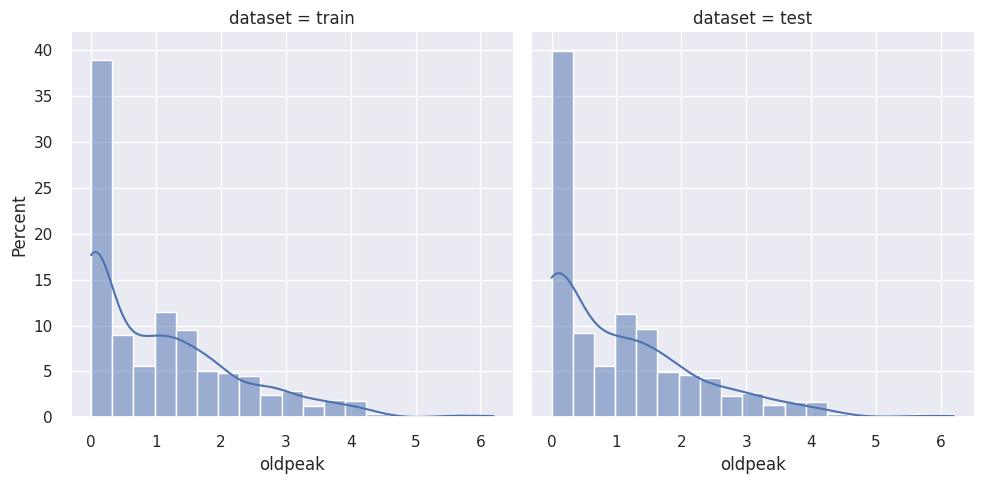

In [25]:
sns.set_theme()
continuousFeatures = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for feature in continuousFeatures:
    sns.displot(data = fullDataset, x = feature, col = 'dataset', kde = True, stat = 'percent', common_norm = False)

##### Visualize the categorical features in the train and test sets.

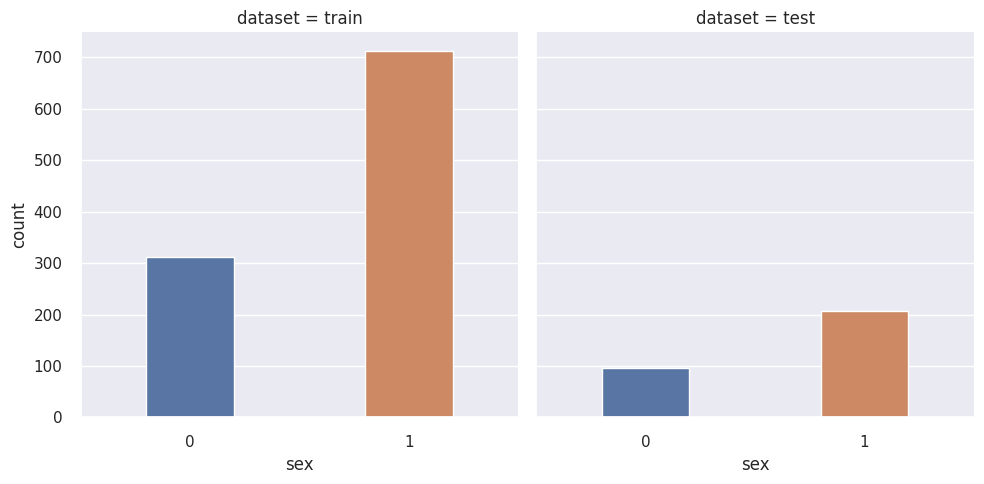

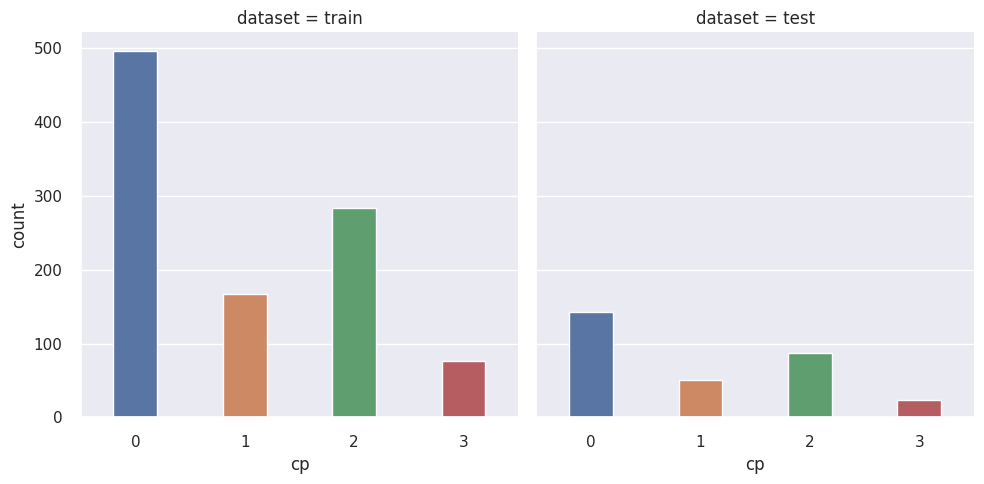

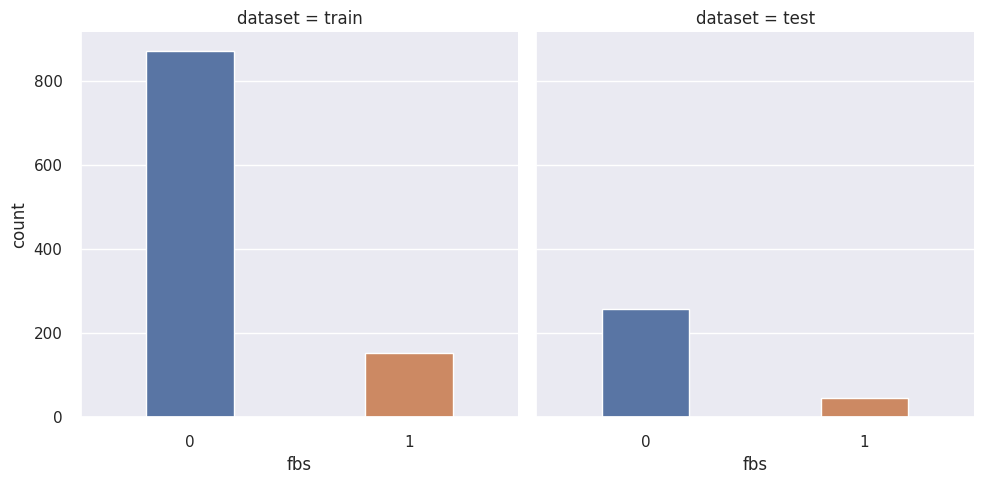

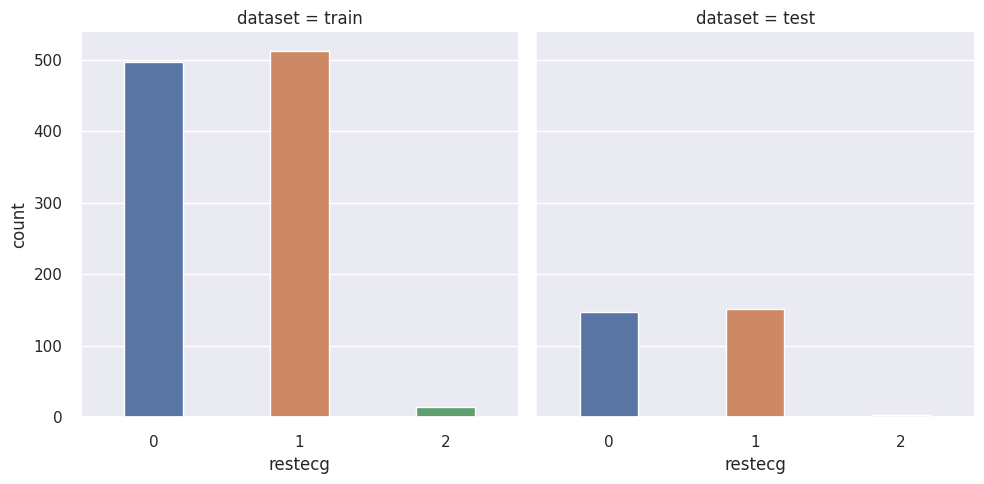

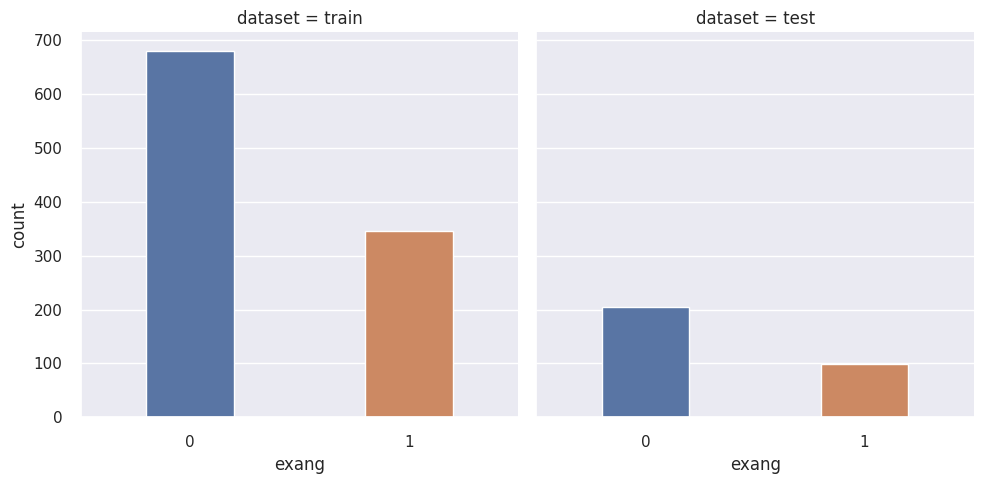

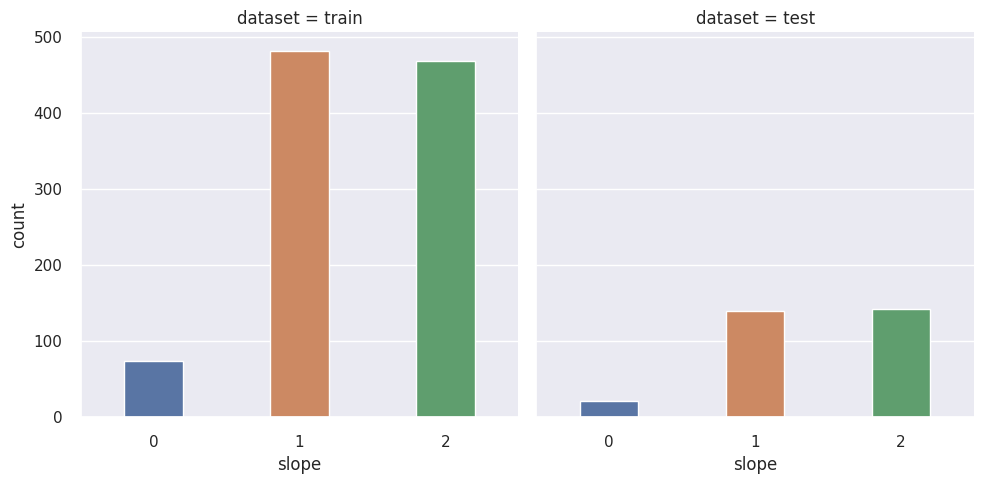

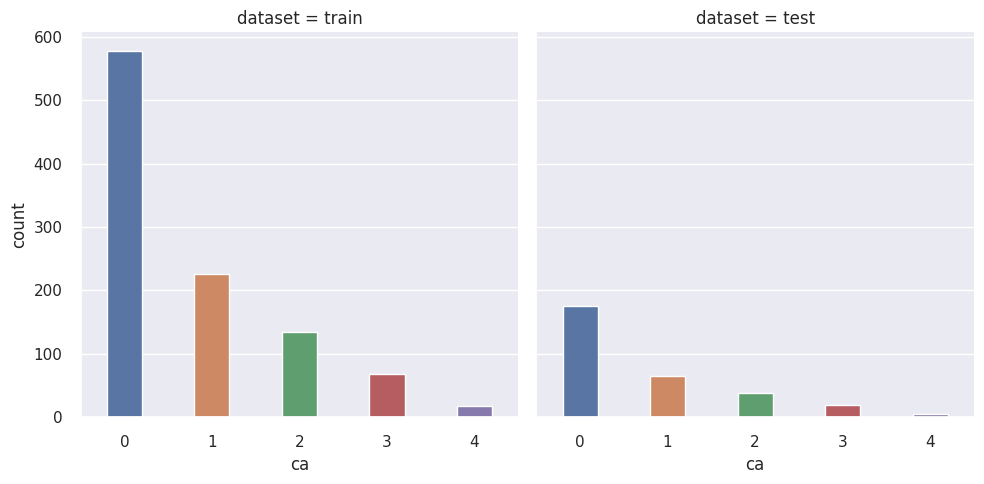

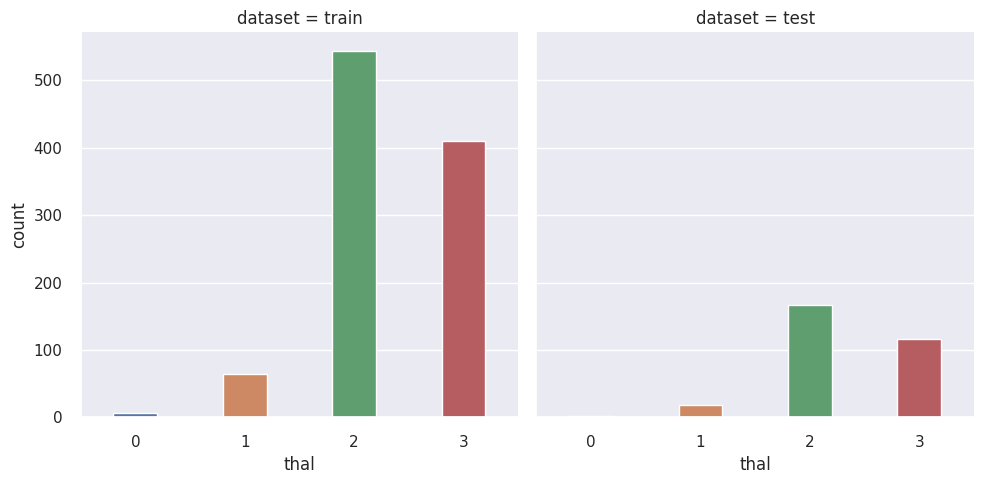

In [28]:
categoricalFeatures = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for feature in categoricalFeatures:
    sns.catplot(data = fullDataset, x = feature, col = 'dataset', kind = 'count', width = 0.4)

##### Initialize the training environment.

In [ ]:
trainingEnv = setup(trainSet, target = 'target', index = False, test_data = testSet, session_id = 1)

,Description,Value
0,Session id,1
1,Target,target
2,Target type,Binary
3,Original data shape,"(1328, 14)"
4,Transformed data shape,"(1328, 14)"
5,Transformed train set shape,"(1025, 14)"
6,Transformed test set shape,"(303, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


##### Train and compare models, and choose the best model.

In [ ]:
bestModel = compare_models()
bestModel

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1230
dt,Decision Tree Classifier,0.9971,0.9972,0.9943,1.0000,0.9971,0.9942,0.9943,0.0260
rf,Random Forest Classifier,0.9971,1.0000,1.0000,0.9945,0.9972,0.9941,0.9943,0.2330
et,Extra Trees Classifier,0.9971,1.0000,1.0000,0.9945,0.9972,0.9941,0.9943,0.3470
lightgbm,Light Gradient Boosting Machine,0.9971,1.0000,1.0000,0.9945,0.9972,0.9941,0.9943,0.5930
catboost,CatBoost Classifier,0.9941,0.9998,1.0000,0.9892,0.9944,0.9883,0.9886,1.9050
gbc,Gradient Boosting Classifier,0.9707,0.9910,0.9735,0.9702,0.9714,0.9415,0.9423,0.1660
ada,Ada Boost Classifier,0.8936,0.9625,0.8917,0.9014,0.8956,0.7872,0.7888,0.1320
lr,Logistic Regression,0.8448,0.9170,0.8992,0.8179,0.8561,0.6885,0.6933,1.1790
qda,Quadratic Discriminant Analysis,0.8418,0.9257,0.8649,0.8348,0.8485,0.6831,0.6855,0.0270


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

##### Plot confusion matrix, ROC cuves, and feature importance.

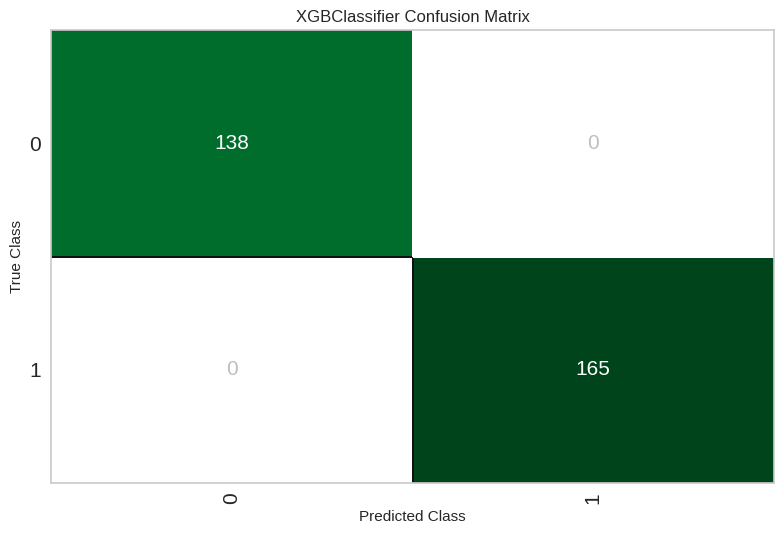

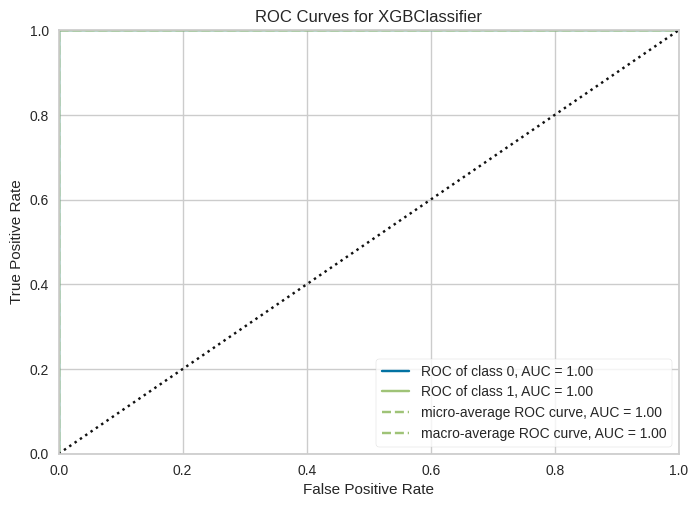

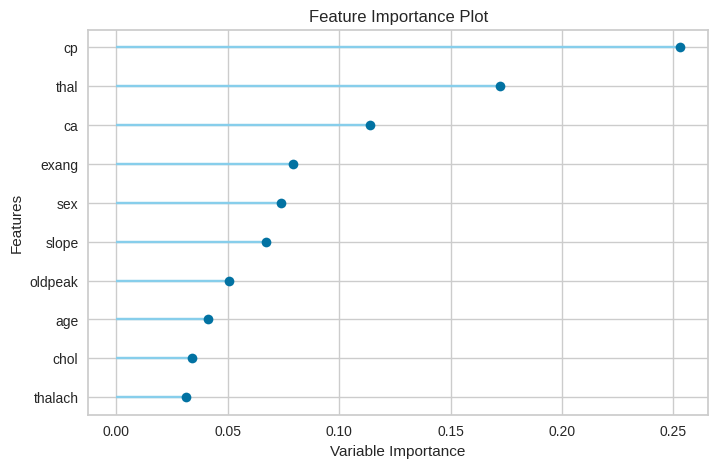

In [ ]:
plot_model(bestModel, plot = 'confusion_matrix')
plot_model(bestModel, plot = 'auc')
plot_model(bestModel, plot = 'feature')

##### Predict on test set

In [ ]:
testSetPredictions = predict_model(bestModel)
testSetPredictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediction_label,prediction_score
1025,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,0.9935
1026,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,0.9922
1027,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0.9999
1028,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0.9996
1029,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0.9965


##### Save pipeline and best model.

In [ ]:
save_model(bestModel, 'bestModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'sex', 'cp', 'trestbps',
                                              'chol', 'fbs', 'restecg',
                                              'thalach', 'exang', 'oldpeak',
                                              'slope', 'ca', 'thal'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='d...
     

##### Load pipeline and best model.

In [ ]:
loadedBestModel = load_model('bestModel')
loadedBestModel

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'sex', 'cp', 'trestbps',
                                             'chol', 'fbs', 'restecg',
                                             'thalach', 'exang', 'oldpeak',
                                             'slope', 'ca', 'thal'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None,
                               objective='binary:logistic', ...))],
         verbose=False)